In [0]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import seaborn as sns

%matplotlib inline

In [32]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [33]:
mcc = pd.read_csv('/content/drive/My Drive/Project Future/mcc_codes.csv') #Διαβαζω τα transactions 1,2,3 mazi
#mcc = pd.read_csv ("C:/Users/Aliki/Desktop/PF Project/Tables/mcc_codes.csv")
mcc

,mcc,edited_description,combined_description,usda_description,irs_description,irs_reportable
0,742,Veterinary Services,Veterinary Services,Veterinary Services,Veterinary Services,Yes
1,763,Agricultural Co-operatives,Agricultural Co-operatives,Agricultural Co-operatives,Agricultural Cooperative,Yes
2,780,"Horticultural Services, Landscaping Services","Horticultural Services, Landscaping Services",Horticultural Services,Landscaping Services,Yes
3,1520,General Contractors-Residential and Commercial,General Contractors-Residential and Commercial,General Contractors-Residential and Commercial,General Contractors,Yes
4,1711,Air Conditioning Contractors – Sales and Insta...,Air Conditioning Contractors – Sales and Insta...,Air Conditioning Contractors – Sales and Insta...,"Heating, Plumbing, A/C",Yes
...,...,...,...,...,...,...
976,9405,Intra – Government Transactions,Intra – Government Transactions,Intra – Government Transactions,U.S. Federal Government Agencies or Departments,No1.6041-3(p)(3)
977,9700,Automated Referral Service ( For Visa Only),Automated Referral Service ( For Visa Only),Automated Referral Service ( For Visa Only),NaN,NaN
978,9701,Visa Credential Service ( For Visa Only),Visa Credential Service ( For Visa Only),Visa Credential Service ( For Visa Only),NaN,NaN
979,9702,GCAS Emergency Services ( For Visa Only),GCAS Emergency Services ( For Visa Only),GCAS Emergency Services ( For Visa Only),NaN,NaN


In [34]:
mcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   mcc                   981 non-null    int64 
 1   edited_description    981 non-null    object
 2   combined_description  973 non-null    object
 3   usda_description      706 non-null    object
 4   irs_description       963 non-null    object
 5   irs_reportable        963 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.1+ KB


In [35]:
codes =  mcc.drop(['edited_description', 'combined_description','usda_description','irs_reportable'], axis=1)
codes

,mcc,irs_description
0,742,Veterinary Services
1,763,Agricultural Cooperative
2,780,Landscaping Services
3,1520,General Contractors
4,1711,"Heating, Plumbing, A/C"
...,...,...
976,9405,U.S. Federal Government Agencies or Departments
977,9700,NaN
978,9701,NaN
979,9702,NaN


In [36]:
#trans = pd.read_csv('/content/drive/My Drive/combined_csv.csv') #Διαβαζω τα transactions 1,2,3 mazi

tr1 = pd.read_csv("/content/drive/My Drive/Project Future/data/transactions_1.csv")
tr2 = pd.read_csv("/content/drive/My Drive/Project Future/data/transactions_2.csv")
tr3 = pd.read_csv("/content/drive/My Drive/Project Future/data/transactions_3.csv")
frames = [tr1,tr2,tr3]
trans = pd.concat(frames)
trans = trans.rename(columns={"ea_merchant_mcc" : "mcc"})
trans

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652
...,...,...,...,...,...,...,...,...,...,...,...,...
681021,transaction_2181021,TOPUP,EUR,18.69,FAILED,NaN,NaN,NaN,NaN,INBOUND,user_6926,2019-05-01 09:30:06.606771
681022,transaction_2181022,TRANSFER,EUR,1.70,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1011,2019-04-30 10:10:36.810961
681023,transaction_2181023,TRANSFER,EUR,4.26,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_3170,2019-05-01 11:34:25.078035
681024,transaction_2181024,TRANSFER,EUR,1.70,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_8195,2019-04-30 16:51:26.445105


In [37]:
trans['transactions_type'].value_counts()

CARD_PAYMENT    1173661
TRANSFER         402126
TOPUP            309740
EXCHANGE         124800
ATM               74181
CASHBACK          65063
FEE               18786
CARD_REFUND        9209
TAX                2267
REFUND             1193
Name: transactions_type, dtype: int64

In [38]:
omg = pd.merge(left=trans, right=codes, how='left', left_on='mcc', right_on='mcc')
omg

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,irs_description
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487,NaN
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032,"Commuter Transport, Ferries"
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032,Fast Food Restaurants
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032,NaN
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652,Family Clothing Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181021,transaction_2181021,TOPUP,EUR,18.69,FAILED,NaN,NaN,NaN,NaN,INBOUND,user_6926,2019-05-01 09:30:06.606771,NaN
2181022,transaction_2181022,TRANSFER,EUR,1.70,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1011,2019-04-30 10:10:36.810961,NaN
2181023,transaction_2181023,TRANSFER,EUR,4.26,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_3170,2019-05-01 11:34:25.078035,NaN
2181024,transaction_2181024,TRANSFER,EUR,1.70,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_8195,2019-04-30 16:51:26.445105,NaN


In [39]:
b = omg[omg['transactions_state'] == 'COMPLETED']
b

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date,irs_description
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487,NaN
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032,"Commuter Transport, Ferries"
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032,Fast Food Restaurants
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032,NaN
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652,Family Clothing Stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181020,transaction_2181020,TRANSFER,EUR,46.81,COMPLETED,NaN,NaN,NaN,NaN,INBOUND,user_1011,2019-04-30 10:14:11.002961,NaN
2181022,transaction_2181022,TRANSFER,EUR,1.70,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1011,2019-04-30 10:10:36.810961,NaN
2181023,transaction_2181023,TRANSFER,EUR,4.26,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_3170,2019-05-01 11:34:25.078035,NaN
2181024,transaction_2181024,TRANSFER,EUR,1.70,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_8195,2019-04-30 16:51:26.445105,NaN


In [40]:
c = b.drop(['transaction_id', 'transactions_type','transactions_currency','ea_cardholderpresence','mcc','ea_merchant_city', 'ea_merchant_country','created_date'], axis=1)
c

,amount_usd,transactions_state,direction,user_id,irs_description
0,4.55,COMPLETED,OUTBOUND,user_4368,NaN
1,15.50,COMPLETED,OUTBOUND,user_2355,"Commuter Transport, Ferries"
2,43.40,COMPLETED,OUTBOUND,user_2355,Fast Food Restaurants
3,10043.01,COMPLETED,OUTBOUND,user_2355,NaN
4,43.81,COMPLETED,OUTBOUND,user_14318,Family Clothing Stores
...,...,...,...,...,...
2181020,46.81,COMPLETED,INBOUND,user_1011,NaN
2181022,1.70,COMPLETED,OUTBOUND,user_1011,NaN
2181023,4.26,COMPLETED,OUTBOUND,user_3170,NaN
2181024,1.70,COMPLETED,OUTBOUND,user_8195,NaN


In [0]:
#c.to_csv('c.csv')

In [0]:
#w = c.dropna(axis = 0)

In [0]:
# Set max rows displayed in output to 4004
pd.set_option("display.max_rows", 280)

In [44]:
#c['irs_description'].value_counts()
c['irs_description'].unique()

array([nan, 'Commuter Transport, Ferries', 'Fast Food Restaurants',
       'Family Clothing Stores',
       'Real Estate Agents and Managers - Rentals',
       'Hotels, Motels, and Resorts', 'Service Stations ',
       'Variety Stores', 'Automated Cash Disburse', 'Cosmetic Stores',
       'Buying/Shopping Services', 'Hotels/Motels/Inns/Resorts',
       'Duty Free Stores', 'Taxicabs/Limousines',
       'Grocery Stores, Supermarkets', 'Automated Fuel Dispensers',
       'Caterers', 'Sporting Goods Stores', 'Computer Network Services',
       'Video Game Arcades', 'Drug Stores and Pharmacies',
       'Miscellaneous Recreation Services', 'Drinking Places',
       'Travel Agencies, Tour Operators',
       'Gift, Card, Novelty, and Souvenir Shops',
       'Barber and Beauty Shops', 'Motion Picture Theaters',
       'Department Stores', 'Professional Services',
       'Eating Places, Restaurants', 'Amusement Parks/Carnivals',
       'Telecommunication Services', 'Aquariums',
       'Direct Ma

In [45]:
type_dict = {'Eating Places, Restaurants': 'food','Fast Food Restaurants' :'food', 'Caterers' : 'food', 'Bakeries' : 'food',

              'Drug Stores and Pharmacies' : 'health','Health and Beauty Spas' : 'health','Medical Services' : 'health',
              'Dentists, Orthodontists' : 'health', 'Hospitals':'health',
              'Doctors':'health', 'Veterinary Services' : 'health',
              'Opticians, Eyeglasses':'health',
              'Nurseries, Lawn and Garden Supply Stores':'health',
              'Drugs, Drug Proprietaries, and Druggist Sundries':'health', 'Medical and Dental Labs':'health',
              'Massage Parlors':'health',
              'Medical, Dental, Ophthalmic, and Hospital Equipment and Supplies':'health',
              'Nursing/Personal Care':'health',
              'Optometrists, Ophthalmologist':'health',
              'Chiropractors':'health',
              'Orthopedic Goods - Prosthetic Devices':'health',
              'Chiropodists, Podiatrists':'health',
              'Osteopaths':'health',
              'Testing Laboratories':'health',
              'Hearing Aids Sales and Supplies':'health',
              'Ambulance Services':'health',
              'Funeral Services, Crematories':'health',
              
              'Grocery Stores, Supermarkets': 'supermarket', 'Miscellaneous Food Stores - Convenience Stores and Specialty Markets':'supermarket',
              'Department Stores' : 'supermarket', 'Miscellaneous Specialty Retail' : 'supermarket', 'Variety Stores' : 'supermarket',
              'Package Stores-Beer, Wine, and Liquor' : 'supermarket' , 'Miscellaneous General Merchandise' : 'supermarket' , 
              'Candy, Nut, and Confectionery Stores' : 'supermarket','Dairy Products Stores' : 'supermarket' , 'Miscellaneous General Services' : 'supermarket',
              'Pet Shops, Pet Food, and Supplies': 'supermarket',
              'Glass, Paint, and Wallpaper Stores':'supermarket',
              'Public Warehousing and Storage - Farm Products, Refrigerated Goods, Household Goods, and Storage':'supermarket',
              'Piece Goods, Notions, and Other Dry Goods':'supermarket',
             

             'Colleges, Universities' : 'education' ,
              'Books, Periodicals, and Newspapers':'education',
              'Stationery Stores, Office, and School Supply Stores':'education',
              'Educational Services' : 'education',
              'Dance Hall, Studios, Schools':'education',
                'Business/Secretarial Schools':'education',
              'Vocational/Trade Schools':'education',
                      'Elementary, Secondary Schools':'education',
                    'Correspondence Schools':'education',





              'Automated Cash Disburse' : 'flat fee', 'Service Stations' : 'flat fee',
               'Direct Marketing - Other' : 'flat fee','Direct Marketing - Subscription' : 'flat fee',
              'Postal Services - Government Only' : 'flat fee', 
              'Telecommunication Equipment and Telephone Sales' : 'flat fee',
              'Direct Marketing - Inbound Tele' : 'flat fee',
                'Tax Payments - Government Agencies':'flat fee',
              'Membership Organizations':'flat fee',
              'Fines - Government Administrative Entities':'flat fee',
              'Direct Marketing - Insurance Services':'flat fee',
              'Tax Preparation Services':'flat fee',






               'Automated Fuel Dispensers' : 'transportation' , 'Car and Truck Dealers (New & Used) Sales, Service, Repairs Parts and Leasing' : 'transportation',
              'Automotive Parts and Accessories Stores' : 'transportation',
            'Fuel Dealers (Non Automotive)':'transportation',
            'Railroads' : 'transportation', 'Car Washes' : 'transportation',
            'Motorcycle Shops and Dealers':'transportation',
            'Automotive Tire Stores':'transportation',
              'Recreational Vehicle Rentals':'transportation',
                'Motorcycle Shops, Dealers':'transportation',
              'Motor Vehicle Supplies and New Parts':'transportation',
                'Automobile Associations':'transportation',
                  'Car and Truck Dealers (Used Only) Sales, Service, Repairs Parts and Leasing':'transportation',
                  'Auto Body Repair Shops':'transportation',
                'Miscellaneous Auto Dealers':'transportation',
                'Tire Retreading and Repair':'transportation',
                  'Truck/Utility Trailer Rentals':'transportation',
                    'Wrecking and Salvage Yards':'transportation',
                    'Auto Paint Shops':'transportation',

              'Commuter Transport, Ferries': 'transportation','Taxicabs/Limousines':'transportation','Passenger Railways':'transportation',
                                             'Parking Lots, Garages' : 'transportation', 'Transportation Services (Not Elsewhere Classified)':'transportation',
                                              'Tolls/Bridge Fees':'transportation' , 'Bus Lines' : 'transportation' , 'Automated Fuel Dispensers' : 'transportation',

              'Family Clothing Stores' : 'shopping', 'Men’s, Women’s Clothing Stores' : 'shopping', 'Gift, Card, Novelty, and Souvenir Shops' : 'shopping',
              'Discount Stores' : 'shopping', 'Cosmetic Stores' : 'shopping', 'Duty Free Stores' : 'shopping', 'Record Stores' : 'shopping',
               'Electronics Stores' : 'shopping' , 'Shoe Stores' : 'shopping', 'Women’s Ready-To-Wear Stores' : 'shopping', 'Hobby, Toy, and Game Shops' : 'shopping' ,
               
               'Art Dealers and Galleries':'culture', 'Artist’s Supply and Craft Shops' : 'culture',
                'Bands, Orchestras' :'culture', 'Music Stores-Musical Instruments, Pianos, and Sheet Music':'culture',
                 'Book Stores' : 'culture' , 'Theatrical Ticket Agencies' : 'culture' , 'Motion Picture Theaters' : 'culture',

               'Hardware Stores' : 'tech', 'Computer Programming' : 'tech' , 'Utilities' : 'tech',
              'Computer Network Services' : 'tech' , 'Computers, Peripherals, and Software':'tech',
              'Hardware, Equipment, and Supplies':'tech',
              'Photo Developing':'tech',
            'Picture/Video Production':'tech',
                  'Commercial Photography, Art and Graphics':'tech',
                    'Computer Repair':'tech',
                  'Photographic, Photocopy, Microfilm Equipment, and Supplies':'tech',
                    'Landscaping Services':'tech',








                 'Charitable and Social Service Organizations - Fundraising':'charity',
             
               'Advertising Services' : 'other', 'Freezer and Locker Meat Provisioners' : 'other',
                  'Agricultural Cooperative' : 'other' , 'Courier Services':'other',
              'Financial Institutions':'other', 'Consulting, Public Relations' : 'other',
                'Wires, Money Orders':'other',
              'Direct Marketing - Combination Catalog and Retail Merchant' : 'other',
                      'U.S. Federal Government Agencies or Departments':'other',
                    'Legal Services, Attorneys' : 'other','Civic, Social, Fraternal Associations':'other',
                    'Insurance Underwriting, Premiums' : 'other',
                  'Equipment Rental' :'other', 'Auto Service Shops':'other',
                  'Photographic Studios':'other',
                  'Miscellaneous Publishing and Printing':'other',
                    'Commercial Equipment (Not Elsewhere Classified)':'other',
                            'Dry Cleaners'  :'other',
                    'Laundry, Cleaning Services':'other',
                  'Marinas, Service and Supplies' : 'other',
                'Motor Freight Carriers and Trucking - Local and Long Distance, Moving and Storage Companies, and Local Delivery Services':'other',
              'Stationary, Office Supplies, Printing and Writing Paper':'other',
                  'Nondurable Goods (Not Elsewhere Classified)':'other',
                      'Durable Goods (Not Elsewhere Classified)':'other',
                  'Quick Copy, Repro, and Blueprint':'other',
                'Accounting/Bookkeeping Services':'other',
                  'Religious Organizations':'other',
              'Manual Cash Disburse':'other',
                    'Industrial Supplies (Not Elsewhere Classified)':'other',
                'Information Retrieval Services':'other',
                'Security Brokers/Dealers':'other',
                'Timeshares':'other',
            'Secretarial Support Services':'other',
                    'Child Care Services':'other',
                'Employment/Temp Agencies':'other',
          'Telegraph Services':'other',
            'Special Trade Contractors':'other',
            'Credit Reporting Agencies':'other',
              'Counseling Services':'other',
            'Detective Agencies':'other',
              'Direct Marketing - Outbound Tele':'other',
          'Political Organizations':'other',
            'Court Costs, Including Alimony and Child Support - Courts of Law':'other',
              'Metal Service Centers':'other',
                    'Typewriter Stores':'other',
              'Towing Services ':'other',

            'Household Appliance Stores': 'house','Home Supply Warehouse Stores' : 'house',
'Furniture, Home Furnishings, and Equipment Stores, Except Appliances':'house',
'Lumber, Building Materials Stores' : 'house' , 'Florists' : 'house',
'Miscellaneous Home Furnishing Specialty Stores':'house',
'Real Estate Agents and Managers - Rentals' : 'house',
'Laundries' : 'house',
'Drapery, Window Covering, and Upholstery Stores':'house',
'Petroleum and Petroleum Products':'house',
'Carpentry Contractors' : 'house',
'Electrical Parts and Equipment' : 'house',
'Construction Materials (Not Elsewhere Classified)':'house',
'Florists Supplies, Nursery Stock, and Flowers':'house',
'Glassware, Crystal Stores':'house',
'Electrical Contractors':'house',
'Cleaning and Maintenance':'house',
'General Contractors':'house',
'Architectural/Surveying Services':'house',
'Floor Covering Stores':'house',
'Paints, Varnishes, and Supplies':'house',
'Small Appliance Repair':'house',
'Electronics Repair Shops':'house',
'Office and Commercial Furniture':'house',
'Swimming Pools Sales':'house',
'Tent and Awning Shops':'house',
'Plumbing, Heating Equipment, and Supplies':'house',
'Specialty Cleaning':'house',
'Heating, Plumbing, A/C':'house',
'Mobile Home Dealers':'house',
'Concrete Work Contractors':'house',
'Typesetting, Plate Making, and Related Services':'other',
'Auto and Home Supply Stores':'house',
'Welding Repair':'house',
'Furniture Repair, Refinishing':'house',
'Carpet/Upholstery Cleaning':'house',
'Masonry, Stonework, and Plaster':'house',
'Fireplace, Fireplace Screens, and Accessories Stores':'house',
'Antique Reproductions':'house',
'Exterminating Services':'house',








             'Sports and Riding Apparel Stores' : 'sports' , 'Sports Clubs/Fields' : 'sports',
              'Bicycle Shops' : 'sports',
              'Sporting/Recreation Camps':'sports',


           'Miscellaneous Apparel and Accessory Shops' : 'shopping', 
'Men’s and Boy’s Clothing and Accessories Stores' : 'shopping',
'Jewelry Stores, Watches, Clocks, and Silverware Stores':'shopping',
'Women’s Accessory and Specialty Shops' : 'shopping' , 'Children’s and Infant’s Wear Stores':'shopping',
'Buying/Shopping Services' :'shopping','Luggage and Leather Goods Stores':'shopping',
'Wholesale Clubs':'shopping',
'Used Merchandise and Secondhand Stores':'shopping',
'Sewing, Needlework, Fabric, and Piece Goods Stores':'shopping',
'Antique Shops':'shopping',
'Precious Stones and Metals, Watches and Jewelry':'shopping',
'Shoe Repair/Hat Cleaning':'shopping',
'Uniforms, Commercial Clothing':'shopping',
'Chemicals and Allied Products (Not Elsewhere Classified)':'shopping',
'Religious Goods Stores':'shopping',
'Tailors, Alterations':'shopping',
'Miscellaneous Repair Shops':'shopping',
'Watch/Jewelry Repair':'shopping',
'Commercial Footwear':'shopping',
'Clothing Rental':'shopping',
'Door-To-Door Sales':'shopping',
'Electric Razor Stores':'shopping',
'Furriers and Fur Shops':'shopping',
'Stamp and Coin Stores':'shopping',
'wig and Toupee Stores':'shopping',
'Pawn Shops':'shopping',


              
              'Drinking Places': 'fun', 'Betting/Casino Gambling' : 'fun', 'Cable, Satellite, and Other Pay Television and Radio':'fun',
              'Sporting Goods Stores' : 'fun', 'Country Clubs' : 'fun' ,
              
'Amusement Parks/Carnivals' : 'fun' , 'Video Game Arcades' : 'fun',
'Camera and Photographic Supply Stores' : 'fun',
'Dating/Escort Services' : 'fun', 
'Aquariums' : 'fun',
'Bowling Alleys':'fun',
'Video Amusement Game Supplies':'fun',
'Billiard/Pool Establishments':'fun',
'Golf Courses - Public':'fun',
'Video Tape Rental Stores':'fun',
'Boat Dealers':'fun',
'Snowmobile Dealers':'fun',

                           
              'Hotels, Motels, and Resorts':'travel', 'Airlines' : 'travel', 'Travel Agencies, Tour Operators' : 'travel',
              'Tourist Attractions and Exhibits' : 'travel' , 'Hotels/Motels/Inns/Resorts' : 'travel' ,
              'Car Rental Agencies' : 'travel' , 'Airlines, Air Carriers' : 'travel', 
'Cruise Lines':'travel', 'Trailer Parks, Campgrounds':'travel',
'Airports, Flying Fields':'travel',
'Car Rental' : 'travel',
'Boat Rentals and Leases':'travel',
'Direct Marketing - Travel':'travel',
'Motor Homes Dealers':'travel',

             
              'Miscellaneous Business Services' : 'other' , 'News Dealers and Newsstands' : 'other' , 'Professional Services' : 'other',
              'Direct Marketing - Other' : 'other', 'Miscellaneous Recreation Services':'other' , 'Barber and Beauty Shops' : 'other' , 
              'Government Services (Not Elsewhere Classified)' : 'other' , 'Advertising Services' : 'other' ,'Computer Programming' : 'other' , 
             
              'Direct Marketing - Subscription' : 'flat fee' , 'Direct Marketing - Catalog Merchant': 'flat fee' , 'Telecommunication Services' : 'flat fee'
              
              }
c['irs_description'] = c['irs_description'].map(type_dict)
c['irs_description'].value_counts()  

supermarket       272595
food              265227
transportation    111127
flat fee           78830
shopping           69032
fun                66739
travel             40971
other              34902
health             23458
culture            18295
house              12245
tech                5058
education           4851
sports              3394
charity             1453
Name: irs_description, dtype: int64

In [46]:
c

,amount_usd,transactions_state,direction,user_id,irs_description
0,4.55,COMPLETED,OUTBOUND,user_4368,NaN
1,15.50,COMPLETED,OUTBOUND,user_2355,transportation
2,43.40,COMPLETED,OUTBOUND,user_2355,food
3,10043.01,COMPLETED,OUTBOUND,user_2355,NaN
4,43.81,COMPLETED,OUTBOUND,user_14318,shopping
...,...,...,...,...,...
2181020,46.81,COMPLETED,INBOUND,user_1011,NaN
2181022,1.70,COMPLETED,OUTBOUND,user_1011,NaN
2181023,4.26,COMPLETED,OUTBOUND,user_3170,NaN
2181024,1.70,COMPLETED,OUTBOUND,user_8195,NaN


In [47]:
c.isna().sum()

amount_usd                 0
transactions_state         0
direction                  0
user_id                    0
irs_description       908210
dtype: int64

In [48]:
done = c.dropna() ##O PROHGOYMENOS PINAKAS XWRIS NAN
done

,amount_usd,transactions_state,direction,user_id,irs_description
1,15.50,COMPLETED,OUTBOUND,user_2355,transportation
2,43.40,COMPLETED,OUTBOUND,user_2355,food
4,43.81,COMPLETED,OUTBOUND,user_14318,shopping
5,2.07,COMPLETED,OUTBOUND,user_14318,transportation
6,10.44,COMPLETED,OUTBOUND,user_2355,transportation
...,...,...,...,...,...
2180979,2.43,COMPLETED,OUTBOUND,user_9696,supermarket
2180981,36.60,COMPLETED,OUTBOUND,user_14457,transportation
2180982,1.75,COMPLETED,OUTBOUND,user_10534,supermarket
2180984,85.11,COMPLETED,OUTBOUND,user_380,flat fee


In [49]:
temp = done.groupby(by=['user_id', 'irs_description'], as_index=False)['amount_usd'].sum()
temp      #kalo = pd.crosstab(index=done['user_id'], columns=done['irs_description' ] )

,user_id,irs_description,amount_usd
0,user_0,food,131.13
1,user_0,fun,84.79
2,user_0,health,27.04
3,user_0,house,30.70
4,user_0,other,1.74
...,...,...,...
86750,user_9998,food,18.77
86751,user_9998,other,7.32
86752,user_9998,shopping,29.70
86753,user_9998,supermarket,3.58


In [50]:
temp1 = done.groupby(['user_id'])['amount_usd'].agg([sum])
temp1

,sum
user_id,
user_0,2212.93
user_1,3568.66
user_10,2001.88
user_100,2060.14
user_1000,374.28
...,...
user_9994,2022.88
user_9995,134.67
user_9996,496.77


In [51]:
temp2 = temp.pivot_table(index = 'user_id' , columns = 'irs_description' , aggfunc = {'amount_usd' : sum }, fill_value = 0) 
temp2

amount_usd                    ...                              
irs_description    charity culture education  ...   tech transportation  travel
user_id                                       ...                              
user_0                 0.0    0.00      0.00  ...   0.00         180.63    0.00
user_1                 0.0    0.00      0.00  ...   0.00          58.51  463.60
user_10                0.0    0.00      0.00  ...   7.59           0.00    3.40
user_100               0.0    0.00      4.44  ...   0.00           0.00  607.74
user_1000              0.0    0.00      0.00  ...   0.00          22.72    0.00
...                    ...     ...       ...  ...    ...            ...     ...
user_9994              0.0   10.04      0.00  ...   0.00           0.00  628.54
user_9995              0.0    0.00      0.00  ...   0.00           0.00    0.00
user_9996              0.0    0.00      0.00  ...   0.00           0.00  166.81
user_9997              0.0    0.00      0.00  ...  24.00          20.60  505.17
user_9998              0.0    0.00      0.00  ...   0.00           8.68    0.00

[12120 rows x 15 columns]

In [52]:
temp2.describe()

amount_usd                ...                             
irs_description       charity       culture  ... transportation        travel
count            12120.000000  12120.000000  ...   12120.000000  12120.000000
mean                 2.490024     38.673993  ...      95.808826    271.007260
std                 24.192910    186.378487  ...     239.550772    797.730198
min                  0.000000      0.000000  ...       0.000000      0.000000
25%                  0.000000      0.000000  ...       0.000000      0.000000
50%                  0.000000      0.000000  ...      14.905000     14.575000
75%                  0.000000     23.135000  ...      86.672500    201.167500
max               1187.930000  12851.250000  ...    5911.000000  19744.320000

[8 rows x 15 columns]

In [0]:
temp2.to_csv('mcc_amount_per_category.csv')

## Some plots

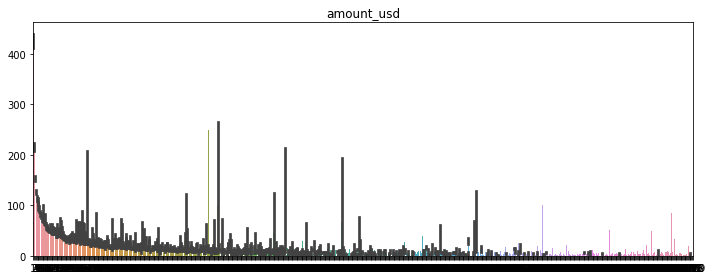

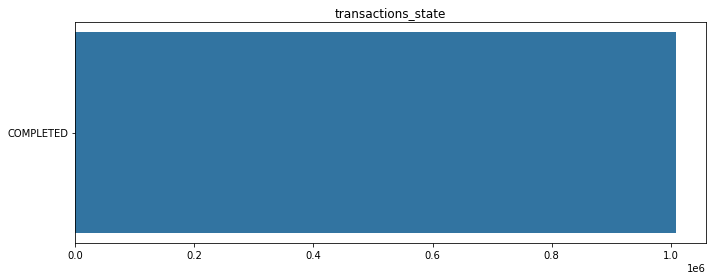

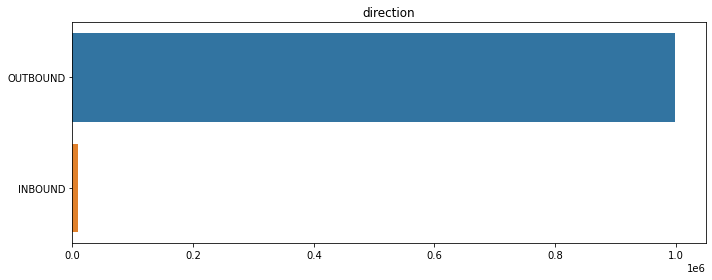

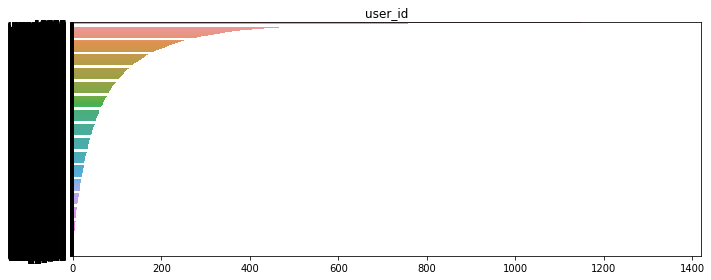

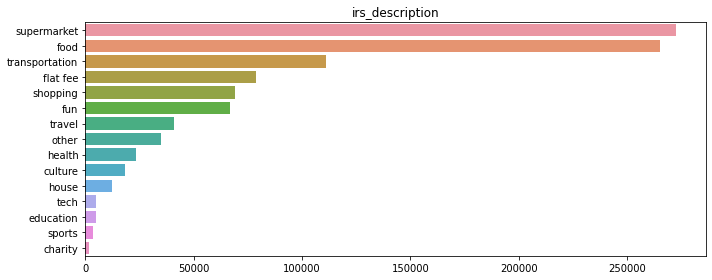

In [54]:
for col in done:
    plt.figure(figsize=(10,4))
    sns.barplot(done[col].value_counts().values, done[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [0]:
kalo = pd.crosstab(index=done['user_id'], columns=done['irs_description' ] )

In [56]:
kalo #O PINAKAS POY 8A XRHSIMOPOIHSOUME GIA NA BROUME POY DINEI TA LEFTA O KA8ENAS!

irs_description,charity,culture,education,flat fee,food,fun,health,house,other,shopping,sports,supermarket,tech,transportation,travel
user_id,,,,,,,,,,,,,,,
user_0,0,0,0,0,13,4,1,5,1,21,1,267,0,21,0
user_1,0,0,0,4,12,3,0,1,8,5,0,29,0,6,4
user_10,0,0,0,3,2,0,1,1,1,23,0,13,2,0,1
user_100,0,0,1,6,11,1,2,0,1,6,0,10,0,0,4
user_1000,0,0,0,1,8,2,0,0,0,0,0,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_9994,0,1,0,3,28,6,1,0,0,0,0,8,0,0,10
user_9995,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
user_9996,0,0,0,1,6,0,0,0,0,1,0,12,0,0,1


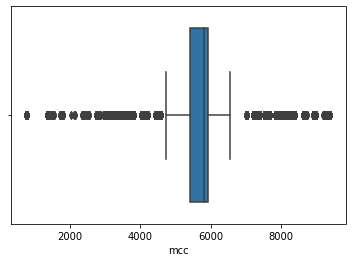

In [57]:
sns.boxplot(omg['mcc']) #with outliers

θελω τον πινακα των users να βάλω την ηλικία του καθενός δίπλα ή έστω την ηλικιακή ομάδα!


In [0]:
c.to_csv('categories_money_spent_with_NaN.csv')

In [0]:
done.to_csv('categories_money_spent_without_NaN.csv')

In [0]:
kalo.to_csv('pinakas_poy_8eloyme.csv')

#ΕΔΩ ΜΠΟΡΟΥΜΕ ΝΑ ΦΤΙΑΞΟΥΜΕ ΕΝΑ SUM ΤΗΣ ΚΑΘΕ ΣΕΙΡΑΣ ΚΑΙ ΝΑ ΒΡΙΣΚΟΥΜΕ ΜΕ ΜΙΑ ΑΠΛΗ ΔΙΑΙΡΕΣΗ ΠΟΣΟ % ΚΑΘΕ ΧΡΗΣΤΗΣ ΞΟΔΕΥΕΙ ΣΕ ΤΙ!

## merge users with temp2 (age with mcc group)

In [60]:
#users = pd.read_csv('users-eda-with-user_id.txt')  # διαβάζω το table των users
users = pd.read_csv ("/content/drive/My Drive/Project Future/Tables/users-eda-with-user_id.txt")
users

,Unnamed: 0,user_id,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,new_num_contacts,new_age,gb,pl,fr,ie,ro,es,lt,pt,mt,de,ch,cz,it,gr,cy,other_country,paid
0,0,user_0,0,1.0,1.0,3,28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,user_1,1,1.0,1.0,47,35,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,user_2,0,1.0,1.0,47,24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,user_3,0,1.0,1.0,47,39,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,user_4,0,1.0,1.0,0,28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,15539,user_15539,0,1.0,1.0,0,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15540,15540,user_15540,0,1.0,1.0,0,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15541,15541,user_15541,0,1.0,1.0,16,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15542,15542,user_15542,0,1.0,1.0,44,43,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2


In [61]:
users['new_age'].unique()

array([28, 35, 24, 39, 30, 22, 20, 65, 60, 40, 58, 42, 25, 26, 41, 55, 23,
       61, 63, 37, 34, 44, 29, 38, 31, 47, 27, 43, 33, 21, 49, 45, 54, 32,
       59, 62, 48, 46, 36, 52, 53, 50, 56, 64, 57, 51, 19])

In [62]:
users['new_age'].min()

19

In [63]:
age_dict = {19 : '18-29',20 : '18-29',21 : '18-29',22 : '18-29',23 : '18-29',24 : '18-29',25 : '18-29',26 : '18-29',
        27  : '18-29',28 : '18-29',29 : '18-29',30 : '30-39',31 : '30-39', 32:'30-39' , 33 :'30-39', 34:'30-39',35 : '30-39' ,
        36 : '30-39',37 :'30-39',38 :'30-39',39:'30-39',40 : '40-49',41 : '40-49',42 : '40-49',43 :'40-49',44 : '40-49',45 :'40-49',
        46 : '40-49',47 : '40-49',48 :'40-49',49 : '40-49',50 : '50-59',51 : '50-59',52 : '50-59',53 : '50-59',
        54 : '50-59',55 : '50-59',56 : '50-59',57 : '50-59',58 : '50-59',59 : '50-59',60 : '60+',61 : '60+',62 : '60+',
        63 :  '60+',64 : '60+',65 : '60+'}
users['group_age'] = users['new_age'].map(age_dict)
users['group_age'].value_counts()  

30-39    5602
18-29    5044
40-49    2721
50-59    1437
60+       740
Name: group_age, dtype: int64

In [64]:

new_age_dict = {'18-29' : 0, '30-39' : 1,'40-49' : 2, '50-59' : 3, '60+' : 4}
users['group_age'] = users['group_age'].map(new_age_dict)
users['group_age'].value_counts() 

1    5602
0    5044
2    2721
3    1437
4     740
Name: group_age, dtype: int64

In [65]:
users

,Unnamed: 0,user_id,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,new_num_contacts,new_age,gb,pl,fr,ie,ro,es,lt,pt,mt,de,ch,cz,it,gr,cy,other_country,paid,group_age
0,0,user_0,0,1.0,1.0,3,28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,user_1,1,1.0,1.0,47,35,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,2,user_2,0,1.0,1.0,47,24,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,user_3,0,1.0,1.0,47,39,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,user_4,0,1.0,1.0,0,28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,15539,user_15539,0,1.0,1.0,0,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15540,15540,user_15540,0,1.0,1.0,0,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15541,15541,user_15541,0,1.0,1.0,16,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
15542,15542,user_15542,0,1.0,1.0,44,43,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2


In [68]:
#users.drop(['new_age'],axis=1,inplace=True)
users

,Unnamed: 0,user_id,user_settings_crypto_unlocked,attributes_notifications_marketing_push,attributes_notifications_marketing_email,new_num_contacts,gb,pl,fr,ie,ro,es,lt,pt,mt,de,ch,cz,it,gr,cy,other_country,paid,group_age
0,0,user_0,0,1.0,1.0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,user_1,1,1.0,1.0,47,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,2,user_2,0,1.0,1.0,47,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,user_3,0,1.0,1.0,47,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,user_4,0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,15539,user_15539,0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15540,15540,user_15540,0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15541,15541,user_15541,0,1.0,1.0,16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
15542,15542,user_15542,0,1.0,1.0,44,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2


In [69]:
users.drop(['Unnamed: 0','user_settings_crypto_unlocked','attributes_notifications_marketing_push' , 'attributes_notifications_marketing_email' , 'new_num_contacts' , 'gb' , 'pl' , 'fr' , 'ie' , 'ro' , 'es' , 'lt' , 'pt' , 'mt' , 'de' , 'ch' , 'cz' , 'it' , 'gr' , 'cy' , 'other_country' , 'paid' ],axis=1,inplace=True)
users

,user_id,group_age
0,user_0,0
1,user_1,1
2,user_2,0
3,user_3,1
4,user_4,0
...,...,...
15539,user_15539,0
15540,user_15540,1
15541,user_15541,2
15542,user_15542,2


In [70]:
final = pd.merge(left=users, right=temp2, how='left', left_on='user_id', right_on='user_id')
final

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,user_id,group_age,"(amount_usd, charity)","(amount_usd, culture)","(amount_usd, education)","(amount_usd, flat fee)","(amount_usd, food)","(amount_usd, fun)","(amount_usd, health)","(amount_usd, house)","(amount_usd, other)","(amount_usd, shopping)","(amount_usd, sports)","(amount_usd, supermarket)","(amount_usd, tech)","(amount_usd, transportation)","(amount_usd, travel)"
0,user_0,0,0.0,0.00,0.00,0.00,131.13,84.79,27.04,30.70,1.74,360.71,68.6,1327.59,0.0,180.63,0.00
1,user_1,1,0.0,0.00,0.00,1183.02,173.86,53.30,0.00,17.15,353.43,986.70,0.0,279.09,0.0,58.51,463.60
2,user_2,0,0.0,0.00,0.00,12.77,79.42,67.82,20.81,0.00,43.06,11.06,0.0,220.31,0.0,52.34,0.00
3,user_3,1,0.0,47.32,0.00,0.00,1191.60,420.13,7.28,0.00,55.64,180.08,0.0,456.63,0.0,32.34,236.34
4,user_4,0,0.0,0.00,0.00,0.00,165.50,4.70,0.00,0.00,23.83,140.18,0.0,24.54,0.0,61.50,5.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,0,0.0,0.00,0.00,33.91,30.42,99.62,0.00,0.00,66.85,521.70,0.0,561.00,0.0,99.67,298.51
15540,user_15540,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.90,0.0,1.64,0.00
15541,user_15541,2,0.0,126.44,9.94,17.07,2577.40,1057.23,43.04,115.53,69.78,376.17,0.0,892.46,0.0,1282.18,158.54
15542,user_15542,2,0.0,0.00,0.00,0.00,16.61,0.00,0.00,0.00,0.00,0.00,0.0,12.48,0.0,0.00,17.02


In [71]:
final.isna().sum()

user_id                            0
group_age                          0
(amount_usd, charity)           3424
(amount_usd, culture)           3424
(amount_usd, education)         3424
(amount_usd, flat fee)          3424
(amount_usd, food)              3424
(amount_usd, fun)               3424
(amount_usd, health)            3424
(amount_usd, house)             3424
(amount_usd, other)             3424
(amount_usd, shopping)          3424
(amount_usd, sports)            3424
(amount_usd, supermarket)       3424
(amount_usd, tech)              3424
(amount_usd, transportation)    3424
(amount_usd, travel)            3424
dtype: int64

In [0]:
final = final.dropna()

In [73]:
final

,user_id,group_age,"(amount_usd, charity)","(amount_usd, culture)","(amount_usd, education)","(amount_usd, flat fee)","(amount_usd, food)","(amount_usd, fun)","(amount_usd, health)","(amount_usd, house)","(amount_usd, other)","(amount_usd, shopping)","(amount_usd, sports)","(amount_usd, supermarket)","(amount_usd, tech)","(amount_usd, transportation)","(amount_usd, travel)"
0,user_0,0,0.0,0.00,0.00,0.00,131.13,84.79,27.04,30.70,1.74,360.71,68.6,1327.59,0.0,180.63,0.00
1,user_1,1,0.0,0.00,0.00,1183.02,173.86,53.30,0.00,17.15,353.43,986.70,0.0,279.09,0.0,58.51,463.60
2,user_2,0,0.0,0.00,0.00,12.77,79.42,67.82,20.81,0.00,43.06,11.06,0.0,220.31,0.0,52.34,0.00
3,user_3,1,0.0,47.32,0.00,0.00,1191.60,420.13,7.28,0.00,55.64,180.08,0.0,456.63,0.0,32.34,236.34
4,user_4,0,0.0,0.00,0.00,0.00,165.50,4.70,0.00,0.00,23.83,140.18,0.0,24.54,0.0,61.50,5.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,0,0.0,0.00,0.00,33.91,30.42,99.62,0.00,0.00,66.85,521.70,0.0,561.00,0.0,99.67,298.51
15540,user_15540,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.90,0.0,1.64,0.00
15541,user_15541,2,0.0,126.44,9.94,17.07,2577.40,1057.23,43.04,115.53,69.78,376.17,0.0,892.46,0.0,1282.18,158.54
15542,user_15542,2,0.0,0.00,0.00,0.00,16.61,0.00,0.00,0.00,0.00,0.00,0.0,12.48,0.0,0.00,17.02


In [0]:
final.to_csv('group_to_age_mcc.csv')

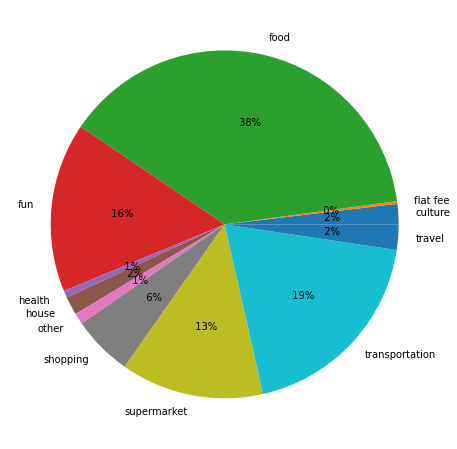

In [75]:
plt.figure(figsize=(8,8))
labels = [ 'culture'  , 'flat fee' , 'food' , 'fun' , 'health' , 'house' , 'other' , 'shopping'  , 'supermarket' , 'transportation' , 'travel']
values = [ 126.44 , 17.07 , 2577.40 , 1057.23 , 43.04 , 115.53 , 69.78 , 376.17 , 892.46 , 1282.18 , 158.54]
plt.pie(values , labels=labels ,  autopct='%3.0f%%')
plt.savefig('user_15541_40_49.png')
plt.show()

## Kmeans


In [76]:
sc = MinMaxScaler()
X = sc.fit_transform(final.drop(['user_id'], axis=1).values)   #.drop(['user_id'], axis=1)

for k in range(3,10):
    kmeans = KMeans(n_clusters = k, n_init=30, random_state=1000)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    print("For k =", k, "The average silhouette_score is :", silhouette_avg)

For k = 3 The average silhouette_score is : 0.5882957141650258
For k = 4 The average silhouette_score is : 0.6818442896368655
For k = 5 The average silhouette_score is : 0.7066152978323045
For k = 6 The average silhouette_score is : 0.7198738211368764
For k = 7 The average silhouette_score is : 0.7100009024759358
For k = 8 The average silhouette_score is : 0.7047780105175995
For k = 9 The average silhouette_score is : 0.6812152991552


In [77]:
k_u = 6
kmeans_cust = KMeans(n_clusters = k_u, n_init=30, random_state=1000)
cust_clusters = kmeans_cust.fit_predict(X)

centroids = sc.inverse_transform(np.array(kmeans_cust.cluster_centers_))

clustering_powerBI = pd.DataFrame(centroids, columns=final.columns[1:])
clustering_powerBI

,group_age,"(amount_usd, charity)","(amount_usd, culture)","(amount_usd, education)","(amount_usd, flat fee)","(amount_usd, food)","(amount_usd, fun)","(amount_usd, health)","(amount_usd, house)","(amount_usd, other)","(amount_usd, shopping)","(amount_usd, sports)","(amount_usd, supermarket)","(amount_usd, tech)","(amount_usd, transportation)","(amount_usd, travel)"
0,1.000000e+00,2.441842,34.708261,4.077226,338.807785,246.436128,129.420035,30.852295,30.960731,87.031112,168.724424,9.987665,249.256808,8.211507,70.705588,202.414433
1,4.000000e+00,2.562407,28.021903,4.178172,380.387649,283.611642,65.581735,45.040709,53.749422,124.404907,206.245896,8.238209,307.954478,14.168750,53.216866,276.614851
2,4.884981e-14,2.097264,34.351928,29.022436,369.173067,264.420905,128.724170,30.279519,33.841823,78.793015,193.209200,12.551439,255.296668,7.400067,108.463511,209.680349
3,3.000000e+00,2.603330,35.980947,7.045854,366.089981,296.759062,81.278255,39.155647,57.862786,91.880826,209.217767,14.132364,312.345432,11.490788,69.259747,322.690403
4,2.000000e+00,2.006418,38.039214,15.023857,326.364570,230.730560,88.812624,33.863666,38.070246,95.928039,189.792329,17.052644,282.093356,10.668555,57.208521,249.329553
5,1.262887e+00,15.921443,266.369536,133.305206,2512.085155,2582.895619,1700.667526,370.147577,586.850464,844.785464,1815.379948,94.058093,2479.529072,112.924072,1056.394897,2979.480722


### ΕΊΝΑΙ 6 ΚΑΤΗΓΟΡΙΕΣ ΑΠΟ ΤΟΝ ΑΠΟ ΠΑΝΩ ΠΙΝΑΚΑ ΠΟΥ ΜΑΣ ΕΞΗΓΕΙ ΠΩΣ ΞΟΔΕΥΕΙ ΚΑΘΕ ΚΑΤΗΓΟΡΙΑ ΤΑ ΧΡΗΜΑΤΑ ΤΗΣ.

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

centers_principalComponents = pca.fit_transform(kmeans_cust.cluster_centers_)
centers_principalDf = pd.DataFrame(data = centers_principalComponents
             , columns = ['principal component 1', 'principal component 2'])

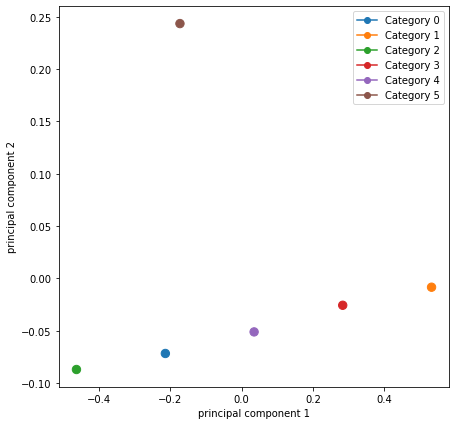

In [79]:
import matplotlib.lines as mlines

colors = ['C' + str(i) for i in range(6)]
labels = ['Category ' + str(i) for i in range(6)]

ax1 = centers_principalDf.plot(kind='scatter', x='principal component 1', y='principal component 2', 
                               color=colors, s=70, figsize=(7,7))

handles = [plt.Line2D((0,0),(0,0), color='C' + str(i), marker='o', label='Category ' + str(i)) for i in range(6)]    
    
plt.legend(handles=handles)

### ΟΥΣΙΑΣΤΙΚΑ ΣΥΜΠΕΡΑΙΝΟΥΜΕ ΟΤΙ ΟΣΟ ΜΕΓΑΛΥΤΕΡΟΣ ΕΙΝΑΙ ΚΑΠΟΙΟΣ ΞΟΔΕΥΕΙ ΟΛΟ ΚΑΙ ΠΕΡΙΣΣΟΤΕΡΑ ΧΡΗΜΑΤΑ ΚΑΘΩΣ ΕΧΕΙ ΑΠΟΤΑΜΙΕΥΣΕΙ ΠΕΡΙΣΣΟΤΕΡΑ. ΕΞΑΙΡΕΣΗ ΑΠΟΤΕΛΕΙ ΜΙΑ ΣΥΓΚΕΚΡΙΜΕΝΑ ΟΜΑΔΑ ΠΟΥ ΚΥΜΑΙΝΕΤΑΙ ΚΑΠΟΥ ΣΤΑ 35 ΧΡΟΝΩΝ Η ΟΠΟΙΑ ΕΙΝΑΙ ΠΙΟ ΠΛΟΥΣΙΑ

In [0]:
clustering_powerBI.to_csv('clustering_powerBI.csv', index = False)

## Kmeans se 


In [127]:
xana = pd.read_csv("/content/drive/My Drive/Project Future/Tables/q_years_sums.txt")
xana.columns


Index(['2018_q1_sum', '2018_q2_sum', '2018_q3_sum', '2018_q4_sum',
       '2019_q1_sum', '2019_q2_sum', 'summs', 'sumsyears', 'compl',
       'Len Compl', 'sum rev', 'Len rev', 'sum decl', 'Len decl', 'sum canc',
       'Len canc', 'sum fail', 'Len fail', 'new', 'Sum  of True Trans',
       'Plh8os True Trans', 'user_id'],
      dtype='object')

In [128]:
new = xana.drop(['summs', 'sumsyears', 'compl',
       'Len Compl', 'sum rev', 'Len rev', 'sum decl', 'Len decl', 'sum canc',
       'Len canc', 'sum fail', 'Len fail', 'new',
       'Plh8os True Trans'],axis=1)
new

,2018_q1_sum,2018_q2_sum,2018_q3_sum,2018_q4_sum,2019_q1_sum,2019_q2_sum,Sum of True Trans,user_id
0,0.000000,0.000000,5.321101,63.486239,14.311927,16.880734,6730.74,user_0
1,5.479452,4.109589,8.219178,19.863014,39.726027,22.602740,11749.00,user_1
2,0.000000,0.000000,0.000000,1.418440,91.134752,7.446809,2464.40,user_2
3,1.265823,1.898734,20.253165,24.683544,33.544304,18.354430,5733.30,user_3
4,6.779661,22.033898,50.847458,13.559322,6.779661,0.000000,894.46,user_4
...,...,...,...,...,...,...,...,...
14816,0.000000,0.000000,64.179104,11.194030,11.940299,12.686567,2121.22,user_15539
14817,0.000000,93.750000,6.250000,0.000000,0.000000,0.000000,90.52,user_15540
14818,0.000000,0.000000,3.139013,28.968610,52.825112,15.067265,15913.50,user_15541
14819,0.000000,0.000000,0.000000,0.000000,80.000000,20.000000,374.21,user_15542


In [129]:
#new = new.drop(['user_id'], axis=1)

cols = new.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols


['user_id',
 '2018_q1_sum',
 '2018_q2_sum',
 '2018_q3_sum',
 '2018_q4_sum',
 '2019_q1_sum',
 '2019_q2_sum',
 'Sum  of True Trans']

In [0]:
new = new[cols]

In [131]:
sc = MinMaxScaler()
X = sc.fit_transform(new.drop(['user_id'], axis=1).values)   #.drop(['user_id'], axis=1)

for k in range(2,10):
    kmeans = KMeans(n_clusters = k, n_init=30, random_state=1000)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    print("For k =", k, "The average silhouette_score is :", silhouette_avg)

For k = 2 The average silhouette_score is : 0.29051171864411435
For k = 3 The average silhouette_score is : 0.30961953932107283
For k = 4 The average silhouette_score is : 0.3582905167569267
For k = 5 The average silhouette_score is : 0.31368507086812264
For k = 6 The average silhouette_score is : 0.3436394933987175
For k = 7 The average silhouette_score is : 0.37478614536046007
For k = 8 The average silhouette_score is : 0.36315080757722323
For k = 9 The average silhouette_score is : 0.35757940283049267


In [132]:
k_u = 7
kmeans_cust = KMeans(n_clusters = k_u, n_init=30, random_state=1000)
cust_clusters = kmeans_cust.fit_predict(X)

centroids = sc.inverse_transform(np.array(kmeans_cust.cluster_centers_))

pd.DataFrame(centroids, columns=new.columns[1:])  ## error [:]


,2018_q1_sum,2018_q2_sum,2018_q3_sum,2018_q4_sum,2019_q1_sum,2019_q2_sum,Sum of True Trans
0,0.447768,0.949409,2.039817,12.632753,66.796852,17.133401,-3.212719e+07
1,0.299285,0.868604,3.514685,83.187778,8.369915,3.759734,-1.703452e+07
2,77.515738,9.129512,4.361370,3.534269,3.331966,2.127145,3.495978e+03
3,5.662742,69.001962,11.388824,5.775952,5.053040,3.117481,-6.597818e+07
4,1.018103,1.959435,4.246551,10.306188,21.139758,61.329966,-7.950668e+06
5,1.977959,6.678442,17.205890,32.347277,28.958069,12.832363,-6.655682e+06
6,1.356603,5.549871,73.649149,9.465308,6.378099,3.600970,-2.535243e+05


In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

centers_principalComponents = pca.fit_transform(kmeans_cust.cluster_centers_)
centers_principalDf = pd.DataFrame(data = centers_principalComponents
             , columns = ['principal component 1', 'principal component 2'])

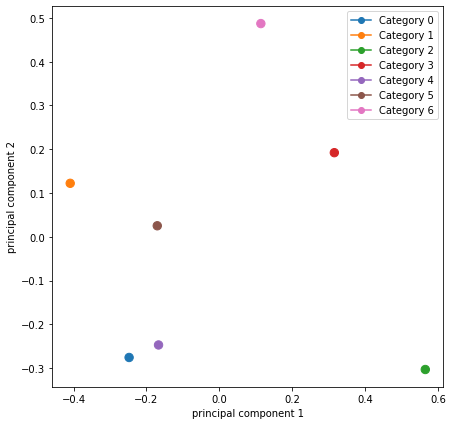

In [134]:
import matplotlib.lines as mlines

colors = ['C' + str(i) for i in range(7)]
labels = ['Category ' + str(i) for i in range(7)]

ax1 = centers_principalDf.plot(kind='scatter', x='principal component 1', y='principal component 2', 
                               color=colors, s=70, figsize=(7,7))

handles = [plt.Line2D((0,0),(0,0), color='C' + str(i), marker='o', label='Category ' + str(i)) for i in range(7)]    
    
plt.legend(handles=handles)